In [1]:
import seaborn as sns
import numpy as np
from scipy.special import expit
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(-5, 5, num=100)

In [3]:
def relog(x, n=10):
  return np.log(x.clip(min=0) + 1/n) / np.log(n) + 1

In [12]:
data = {
    'ReLU': x.clip(min=0),
    'Sigmoid': expit(x),
    'ReLog n=3': relog(x, n=3),
    'ReLog n=5': relog(x, n=5),
    'ReLog n=10': relog(x, n=10),
    'ReLog n=100': relog(x, n=100),
}

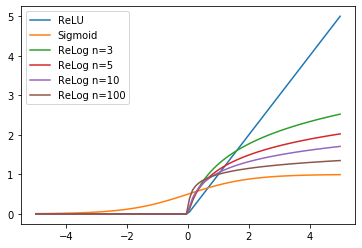

In [13]:
for label, vals in data.items():
    plt.plot(x, vals, label=label)
plt.legend(loc=2)
None

# Explore more values

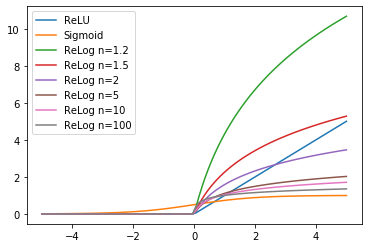

In [6]:
data = {
    'ReLU': x.clip(min=0),
    'Sigmoid': expit(x),
    'ReLog n=1.2': relog(x, n=1.2),
    'ReLog n=1.5': relog(x, n=1.5),
    'ReLog n=2': relog(x, n=2),
    'ReLog n=5': relog(x, n=5),
    'ReLog n=10': relog(x, n=10),
    'ReLog n=100': relog(x, n=100),
}
for label, vals in data.items():
    plt.plot(x, vals, label=label)
plt.legend(loc=2)
None

# Interpolation

In [7]:
ks = np.linspace(0, 1, 11)
interp = [None] * len(ks)
for i, k in enumerate(ks):
    interp[i] = k * relog(x, n=10) + (1-k) * x.clip(min=0)

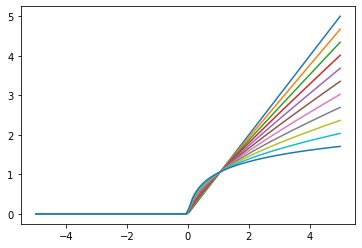

In [8]:
for y in interp:
    plt.plot(x, y)
None

# Interpolation

With interpolation, an effect of the increase in log strength is a loss of variation in the next layer. This part simulate a correction for this issue.

In [244]:
ks = np.linspace(0, 1, 11) # interpolation coefficient ("log strength")
z0 = np.random.rand(10, 10)*4 # net input of previous layer
w = np.random.randn(10)
zs = np.zeros((z0.shape[0], len(ks))) # net input target layer
interp_func = lambda z: k * relog(z, n=10) + (1-k) * z.clip(min=0)
for i, k in enumerate(ks):
    y0 = interp_func(z0) * (1+2*k*k) # output of previous layer
    x = y0 # input target layer
    zs[:,i] = w @ x 

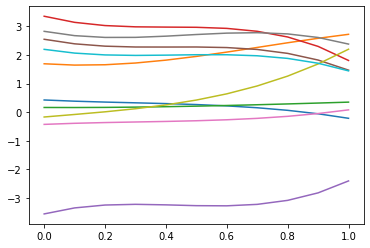

In [245]:
for zs_row in zs:
    plt.plot(ks, zs_row)

In [241]:
zs.std(axis=1).std()

0.15938584994831556

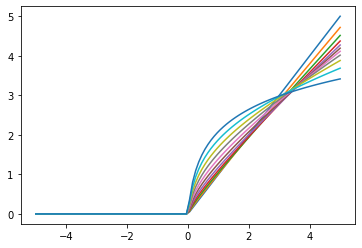

In [187]:
x = np.linspace(-5, 5, num=100)
ks = np.linspace(0, 1, 11)
for i, k in enumerate(ks):
    y = (k * relog(x, n=10) + (1-k) * x.clip(min=0))*(1+k*k)
    plt.plot(x, y)